#Thư viện

In [1]:
import os
import datetime
import IPython
import IPython.display
import math
import numpy as np
from numpy import linalg
from numpy.linalg import eig
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import pandas as pd 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.optimizers import RMSprop

In [2]:
data = pd.read_csv("D:\Dataset luanvan\T1.csv")

In [3]:
print(data)

              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645905          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.641113  
2                         390.

In [4]:
data.columns= ['Date time','LV ActivePower(kW)','Wind speed(m/s)','Theoretical Power curve(kWh)','Wind direction(Degree)']
data['Date time'] = pd.to_datetime(data['Date time'], dayfirst= True)
print('Du lieu goc tu file T1.csv:\n', data)

Du lieu goc tu file T1.csv:
                 Date time  LV ActivePower(kW)  Wind speed(m/s)  \
0     2018-01-01 00:00:00          380.047791         5.311336   
1     2018-01-01 00:10:00          453.769196         5.672167   
2     2018-01-01 00:20:00          306.376587         5.216037   
3     2018-01-01 00:30:00          419.645905         5.659674   
4     2018-01-01 00:40:00          380.650696         5.577941   
...                   ...                 ...              ...   
50525 2018-12-31 23:10:00         2963.980957        11.404030   
50526 2018-12-31 23:20:00         1684.353027         7.332648   
50527 2018-12-31 23:30:00         2201.106934         8.435358   
50528 2018-12-31 23:40:00         2515.694092         9.421366   
50529 2018-12-31 23:50:00         2820.466064         9.979332   

       Theoretical Power curve(kWh)  Wind direction(Degree)  
0                        416.328908              259.994904  
1                        519.917511              268.6

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date time                     50530 non-null  datetime64[ns]
 1   LV ActivePower(kW)            50530 non-null  float64       
 2   Wind speed(m/s)               50530 non-null  float64       
 3   Theoretical Power curve(kWh)  50530 non-null  float64       
 4   Wind direction(Degree)        50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB
None


In [6]:
data.rename(columns={'Date time':'Time'}, inplace=True)
#print(data.head(10))

def month (x):
    if x == 1:
        return "Jan."
    elif x == 2:
        return "Feb."
    elif x == 3:
        return "Mar."
    elif x == 4:
        return "Apr."
    elif x == 5:
        return "May"
    elif x == 6:
        return "Jun."
    elif x == 7:
        return "Jul."
    elif x == 8:
        return "Aug."
    elif x == 9:
        return "Sep."
    elif x == 10:
        return "Oct."
    elif x == 11:
        return "Nov."
    else:
        return "Dec."
data['Month'] = data['Time'].dt.month.apply(month)

def mean_spead(x):
    list = []
    i = 0.25
    while i <= 25.5:
        list.append(i)
        i+=0.5

    for i in list:
        if x < i:
            x = i - 0.25
            return x
data['Mean_speed'] = data['Wind speed(m/s)'].apply(mean_spead)

def mean_direction(x):
    list = []
    i = 15
    while i <= 375:
        list.append(i)
        i+=30

    for i in list:
        if x < i:
            x = i - 15
            if x == 360:
                return 0 
            else: 
                return x

data['Mean_direction(degree)'] = data['Wind direction(Degree)'].apply(mean_direction)

def find_direction(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W" 
    if x==300:
        return "NWW" 
    if x==330:
        return "NNW"
data['Direction'] = data['Mean_direction(degree)'].apply(find_direction)

In [7]:
print(data)

                     Time  LV ActivePower(kW)  Wind speed(m/s)  \
0     2018-01-01 00:00:00          380.047791         5.311336   
1     2018-01-01 00:10:00          453.769196         5.672167   
2     2018-01-01 00:20:00          306.376587         5.216037   
3     2018-01-01 00:30:00          419.645905         5.659674   
4     2018-01-01 00:40:00          380.650696         5.577941   
...                   ...                 ...              ...   
50525 2018-12-31 23:10:00         2963.980957        11.404030   
50526 2018-12-31 23:20:00         1684.353027         7.332648   
50527 2018-12-31 23:30:00         2201.106934         8.435358   
50528 2018-12-31 23:40:00         2515.694092         9.421366   
50529 2018-12-31 23:50:00         2820.466064         9.979332   

       Theoretical Power curve(kWh)  Wind direction(Degree) Month  Mean_speed  \
0                        416.328908              259.994904  Jan.         5.5   
1                        519.917511          

In [8]:
data1=data[(data["Wind speed(m/s)"]>3.5) & (data["Wind speed(m/s)"]<=25.5)]
data2=data1[((data1["LV ActivePower(kW)"] > 0)&(data1["Wind speed(m/s)"]>3.5)) | ((data1["LV ActivePower(kW)"] > 0)&(data1["Wind speed(m/s)"]<=25.5))]
#print(len(data1))
#print(len(data2))
data_clean=data2.sort_values("Time")
data_clean["Loss_Value(kW)"]=data_clean["Theoretical Power curve(kWh)"]-data_clean["LV ActivePower(kW)"]
data_clean["Loss(%)"]=data_clean["Loss_Value(kW)"]/data_clean["Theoretical Power curve(kWh)"]*100
#round the values to 2 digit.
data_clean=data_clean.round({'LV ActivePower(kW)': 2, 'Wind speed(m/s)': 2, 'Theoretical Power curve(kWh)': 2,
                                   'Wind direction(Degree)': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})

In [9]:
data_clean = data_clean.reset_index(drop = True)
features = ['LV ActivePower(kW)', 'Wind speed(m/s)', 'Theoretical Power curve(kWh)', 'Wind direction(Degree)' ]
x = data_clean.loc[:, features]
y = data_clean.loc[:, 'LV ActivePower(kW)']
print(x)

       LV ActivePower(kW)  Wind speed(m/s)  Theoretical Power curve(kWh)  \
0                  380.05             5.31                        416.33   
1                  453.77             5.67                        519.92   
2                  306.38             5.22                        390.90   
3                  419.65             5.66                        516.13   
4                  380.65             5.58                        491.70   
...                   ...              ...                           ...   
38410             2963.98            11.40                       3397.19   
38411             1684.35             7.33                       1173.06   
38412             2201.11             8.44                       1788.28   
38413             2515.69             9.42                       2418.38   
38414             2820.47             9.98                       2779.18   

       Wind direction(Degree)  
0                      259.99  
1                      

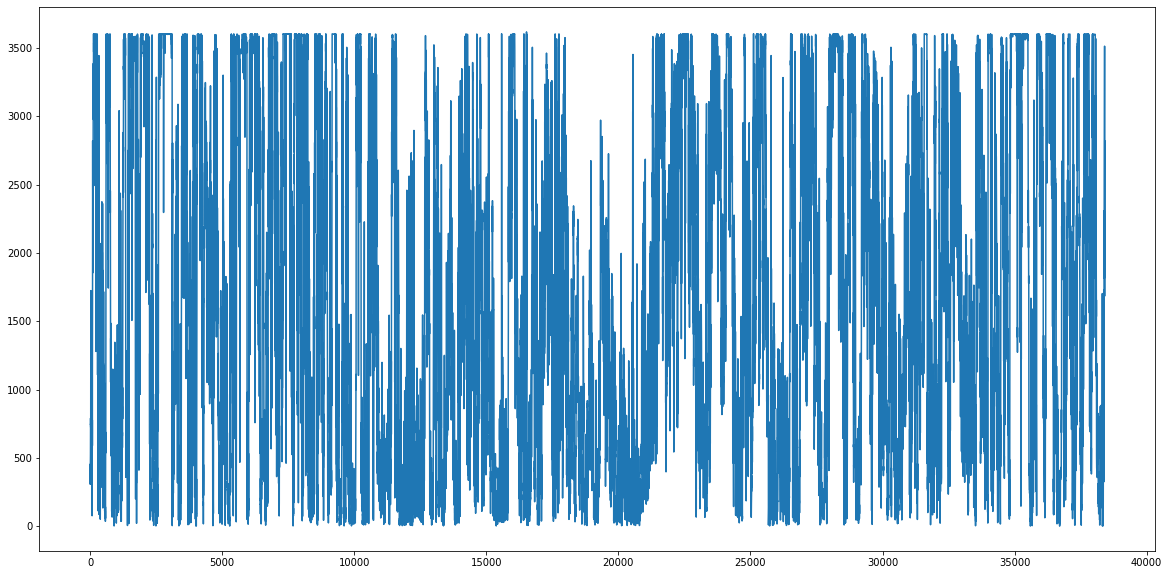

In [10]:
#data_train = data_clean[0:32000]
#data_valid = data_clean[32000:35597]
#data_test = data_clean[35597:]
#print(data_train)
x_array = x.to_numpy(copy=True)
#print(x_array)
#print(x_array[-1])
power_active = x_array[:, 0]
fig = plt.figure(figsize = (20,10)) 
plt.plot(range(len(power_active)), power_active)



trainning_data = x_array[:int(0.7 * len(x_array))]
validate_data = x_array[int(0.7 * len(x_array)): int(0.9 * len(x_array))]
testing_data = x_array[int(0.9 * len(x_array)):]
#print(testing_data[:10,0])

In [11]:
scalar = StandardScaler()
scalar.fit(trainning_data) # Chuẩn hóa dữ liệu
mean_train = scalar.mean_ # Lấy giá trị trung bình trong tập train
normalized_train = scalar.transform(trainning_data)
std_train = (trainning_data - mean_train) / (normalized_train)
print(std_train[0])#Tính giá trị độ lệch chuẩn trong tập train
normalized_valid = (validate_data - mean_train) / std_train[0] #Chuẩn hóa tập giá trị valid
normalized_test = (testing_data - mean_train) / std_train[0] #Chuẩn hóa tập giá trị test
#normalized_test = scalar.inverse_transform(trainning_data, copy = True)
#print(normalized_test)
#print(len(normalized_train), '\n')
#print(mean_train)
#print(std_train[1][0].round(4))
#print(normalized_train[:,0])
#print(normalized_valid)
#print('_'*40)
#print(normalized_test)
#target_array = trainning_data[:,0]
#test_dt = pd.DataFrame(normalized_train, columns = ['Normal_P', 'Normal_W', 'Normal_TH','Normal_WD'])
#normalized_train = test_dt.assign(target = test_dt['Normal_P'])
#test_dt1 = pd.DataFrame(target_array, columns = ['target'])
#test_dt2= test_dt.assign(target = test_dt1)
#print(normalized_train)


[1251.1469271     3.76712506 1297.19442742   87.14444848]


In [12]:
n_compo = 3
pca = PCA(n_components= n_compo, svd_solver = 'full')
pca.fit(normalized_train)
#PCA cho 3 tập dữ liệu
pca_train = pca.transform(normalized_train)
pca_valid = pca.transform(normalized_valid)
pca_test = pca.transform(normalized_test)



In [13]:
df_normalized = pd.DataFrame(normalized_train, columns = ['Normal_P', 'Normal_W','Normal_TH','Normal_WD'])
df_pca_train = pd.DataFrame(pca_train, columns = ['Prin1', 'Prin2', 'Prin3'])
df_pca_train = df_pca_train.assign(target = df_normalized['Normal_P'])

df_normalized1 = pd.DataFrame(normalized_valid, columns = ['Normal_P', 'Normal_W','Normal_TH','Normal_WD'])
df_pca_valid = pd.DataFrame(pca_valid, columns = ['Prin1', 'Prin2', 'Prin3'])
df_pca_valid = df_pca_valid.assign(target = df_normalized1['Normal_P'])

df_normalized2 = pd.DataFrame(normalized_test, columns = ['Normal_P', 'Normal_W','Normal_TH','Normal_WD'])
df_pca_test = pd.DataFrame(pca_test, columns = ['Prin1', 'Prin2', 'Prin3'])
df_pca_test = df_pca_test.assign(target = df_normalized2['Normal_P'])

In [14]:
df_pca_temp = pd.concat((df_pca_train, df_pca_valid), axis = 0, ignore_index = True)
df_pca_data = pd.concat((df_pca_temp, df_pca_test), axis = 0, ignore_index = True)
df_pca_data_1 = df_pca_data.iloc[:, 0:3]
print(df_pca_data_1)

          Prin1     Prin2     Prin3
0     -1.625099  1.748445 -0.003497
1     -1.483555  1.838927  0.014750
2     -1.674407  1.896038  0.001997
3     -1.500521  1.870228  0.023640
4     -1.545926  1.809030  0.029643
...         ...       ...       ...
38410  1.683103 -0.562830 -0.322672
38411 -0.514626 -0.349734 -0.124817
38412  0.167568 -0.395064 -0.238440
38413  0.742243 -0.447447 -0.316485
38414  1.127462 -0.501906 -0.402160

[38415 rows x 3 columns]


In [15]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0:3]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 3])
	return np.array(dataX), np.array(dataY)

In [16]:
look_back = 1
XY_train = df_pca_data[:int(0.7 * len(df_pca_data))]
XY_valid = df_pca_data[int(0.7 * len(df_pca_data)): int(0.9 * len(df_pca_data))]
XY_test = df_pca_data[int(0.9 * len(df_pca_data)):]

In [17]:
trainX, trainY = create_dataset(XY_train.values, look_back)
validX, validY = create_dataset(XY_valid.values, look_back)
testX, testY = create_dataset(XY_test.values, look_back)


In [18]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[-1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[-1]))
validX = np.reshape(validX, (validX.shape[0], 1, validX.shape[-1]))

In [19]:
from random import shuffle
def base_line_cal():
    batch_mae = []
    for i in range(5):
        preds = validY.copy()
        shuffle(preds)
        mae = np.mean(np.abs(preds - validY))
        batch_mae.append(mae)
        a = np.mean(batch_mae)
    return a.round(4)


In [20]:
base_line_cal()

1.059

def evaluate_naive_method():
    batch_maes = []
    for step in range(len(df_pca_valid)):
        samples, targets = next(valid_gen)
        preds = samples[:, -1, 3]
        shuffle(preds)
        mae = np.mean(np.abs(preds - targets[:, ]))
        batch_maes.append(mae)
        a = np.mean(batch_maes)
        #print(mae)
        #print(mae)
    return(a)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, None, 24)          672       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 24)          1176      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 24)                1176      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 3,049
Trainable params: 3,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
200/200 [==============================] - 13s 53ms/step - loss: 0.2047 - root_mean_squared_error: 0.3286 - val_loss: 0.1723 - val_root_mean_squared_error: 0.2434
Epoch 2/30

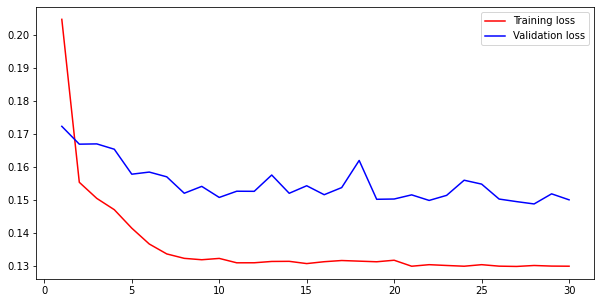

In [27]:
model  = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(24, activation = 'tanh', return_sequences= True, 
                                    input_shape = (None, trainX.shape[-1])))
model.add(tf.keras.layers.SimpleRNN(24, activation = 'tanh', return_sequences= True))
model.add(tf.keras.layers.SimpleRNN(24, activation = 'tanh', return_sequences= False))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mae', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()
history = model.fit(x = trainX, y = trainY, steps_per_epoch = 200, epochs=30, 
                    validation_data = (validX, validY), 
                    validation_steps = len(validX))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)



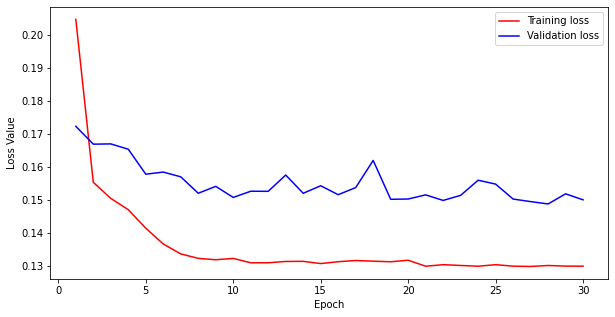

In [29]:
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()


In [34]:
def plot_results_multiple(predicted_data, true_data, length):
    figure = plt.figure(figsize = (10,8))
    true_data.reshape(-1, 1)
    true_plot = true_data * std_train[0][0] + mean_train[0]
    predicted_tmp = np.array(predicted_data)
    predicted_tmp.reshape(-1, 1)
    predicted_plot = predicted_tmp * std_train[0][0] + mean_train[0]
    plt.xlabel('Time(10mins)')
    plt.ylabel('ActivePower(kW)')
    plt.plot(true_plot[length:], label ='Real value')
    plt.plot(predicted_plot[length:], label = 'Prediction')
    plt.legend(loc = 0)
    plt.show()

In [23]:
from numpy import newaxis
def predict_sequences_multiple(model, firstValue, length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        #print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])

        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        prediction_seqs.append(predicted[-1])

        
    return prediction_seqs

In [43]:
predict_length = len(testY)

#predictions = predict_sequences_multiple(model, testX[0], predict_length)
baba = model.evaluate(x = testX[:,:], y = testY, verbose = 1, steps = 1)
haha = model.predict(testX[:,:])
print(len(haha))
for i in baba:
    print(format(i, '.4f'))

1/1 [==============================] - 0s 28ms/step - loss: 0.1177 - root_mean_squared_error: 0.1967
3840
0.1177
0.1967


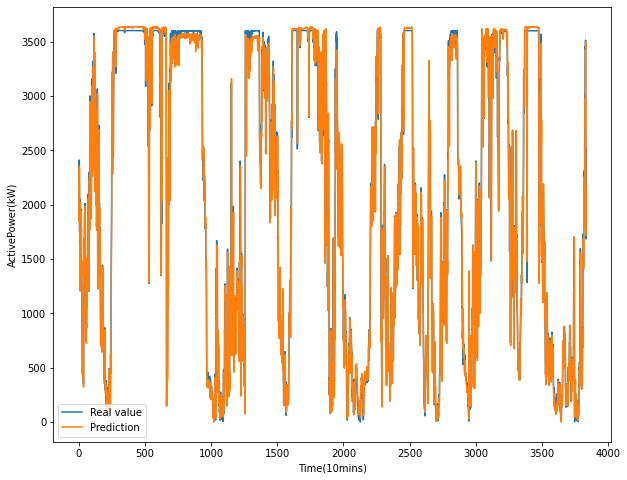

In [35]:
plot_results_multiple(haha, testY, 5)

In [26]:

plot_results_predict(haha, 5)

NameError: name 'plot_results_predict' is not defined

In [ ]:
plot_results_predict(predictions, 5)